# 3 - Regresión lineal: ¿Me tima el casero?

In [9]:
%matplotlib inline  

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plots 

In [10]:
alquileres_raw = [(2,67,500),
                  (2,100,700), 
                  (3,105,650),
                  (4,106,650),
                  (4,130,700),(1,45,450),
                  (1,45,490),(3,90,450),(1,45,490),(1,41,390),
                  (1,45,480),
                  (2,80,600),(1,40,320),(2,78,600),(3,87,500),(1,40,400),
                  (1,35,390),(1,45,460),(2,78,600),(1,65,550),
                  (1,90,750),
                  (1,50,450),(1,50,500),]

Creamos un dataframe con los datos de los alquileres

In [11]:
alquileres = pd.DataFrame(alquileres_raw, 
                          columns=['habitaciones','m2', 'precio'])
alquileres.head()

,habitaciones,m2,precio
0,2,67,500
1,2,100,700
2,3,105,650
3,4,106,650
4,4,130,700


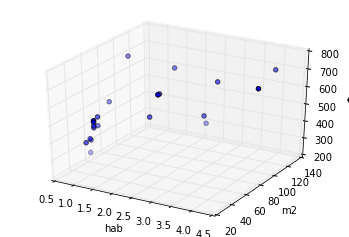

In [12]:
from mpl_toolkits.mplot3d import axes3d, Axes3D 

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(alquileres.habitaciones, alquileres.m2, alquileres.precio)

ax.set_xlabel('hab')
ax.set_ylabel('m2')
ax.set_zlabel('€')

plt.show()


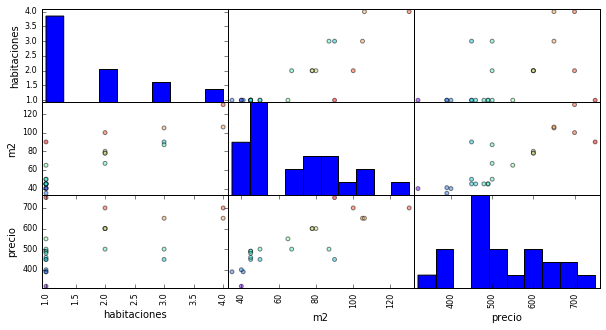

In [16]:
from pandas.tools.plotting import scatter_matrix

_ = scatter_matrix(alquileres[['habitaciones','m2','precio']], figsize=(10, 5), 
               diagonal='hist' , s=60,  c=alquileres.precio , cmap=plt.cm.rainbow)

In [17]:
alquileres.corr()

,habitaciones,m2,precio
habitaciones,1.000000,0.873777,0.528088
m2,0.873777,1.000000,0.832420
precio,0.528088,0.832420,1.000000


Creamos y entrenamos el modelo.

In [18]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
X = alquileres[['habitaciones','m2']]
Y = alquileres.precio
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Interpretando el modelo

In [19]:
regr.coef_, regr.intercept_

(array([-94.48530073,   6.57883338]), 243.74645492958905)

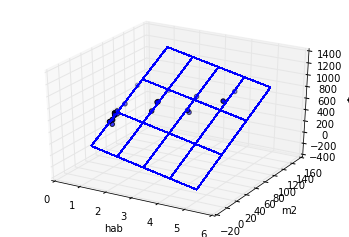

In [20]:


test = pd.DataFrame(alquileres, columns=['habitaciones','m2'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.set_xlabel('hab')
ax.set_ylabel('m2')
ax.set_zlabel('€')


XX = np.arange(1, 6, 1)
YY = np.arange(0, 200, 50)
XX, YY = np.meshgrid(XX, YY)
ZZ = XX *regr.coef_[0] + YY *regr.coef_[1] + regr.intercept_
ax.plot_wireframe(XX, YY, ZZ, rstride=1, cstride=1, linewidth=1, antialiased=False)
ax.scatter(alquileres.habitaciones, alquileres.m2, alquileres.precio)


¿Me tima mi casero? ¿Cuánto pronostica el model que debería costar el alquiler de un piso con una habitación y 32 metros cuadrados?

In [21]:
regr.predict( [[1,32]] )

array([ 359.78382222])

Evaluamos el modelo. 

The coefficient R^2 is defined as (1 - u/v), where u is the regression sum of squares ((y_true - y_pred) ** 2).sum() and v is the residual sum of squares ((y_true - y_true.mean()) ** 2).sum(). Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [22]:
regr.score(X,Y)

0.86080013931248489

## ¿Porqué un plano? Polinomios

Para trabajar con polinomios y otro tipo de funciones se crean atributos a mayores.

In [23]:
X['habitaciones2'] = X['habitaciones'] * X['habitaciones']
X['m4'] = X['m2'] * X['m2']
X['hm'] = X['habitaciones'] * X['m2']

In [24]:
X.head()

,habitaciones,m2,habitaciones2,m4,hm
0,2,67,4,4489,134
1,2,100,4,10000,200
2,3,105,9,11025,315
3,4,106,16,11236,424
4,4,130,16,16900,520


In [26]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)
regr.score(X,Y)

0.87336815365506304

El resultado es mejor que la regresión lineal anterior. 

¿Me tima mi casero? Para realizar el pronóstico ahora hay que pasar el valor de los atributos creados con x², y²...

In [27]:
regr.predict([[1,36,1,36^2, 36]])

array([ 420.35454274])

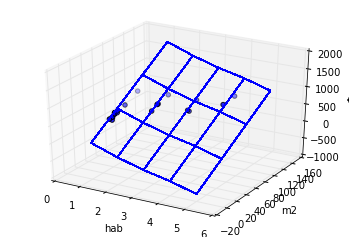

In [28]:

test = pd.DataFrame(test, columns=['habitaciones','m2'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.set_xlabel('hab')
ax.set_ylabel('m2')
ax.set_zlabel('€')


XX = np.arange(1, 6, 1)
YY = np.arange(0, 200, 50)
XX, YY = np.meshgrid(XX, YY)
ZZ = XX *regr.coef_[0] + YY *regr.coef_[1] + (XX^2) *regr.coef_[2] + (YY^2) *regr.coef_[3] + (YY*XX) *regr.coef_[3] + regr.intercept_
ax.plot_wireframe(XX, YY, ZZ, rstride=1, cstride=1, linewidth=1, antialiased=False)
ax.scatter(alquileres.habitaciones, alquileres.m2, alquileres.precio)